# Email Spam Detection Using Naive Bayes

## Importing Required Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shishir__/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /Users/shishir__/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Error with downloaded zip file


False

In [56]:
!pip install wordcloud

In [58]:
from wordcloud import WordCloud, STOPWORDS

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [78]:
from sklearn.feature_extraction.text import CountVectorizer

## Loading Dataset

In [9]:
df = pd.read_csv('spam_or_not_spam.csv')
df.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


## Observing Dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [19]:
df = df.dropna()

In [23]:
df.isnull().sum()

email    0
label    0
dtype: int64

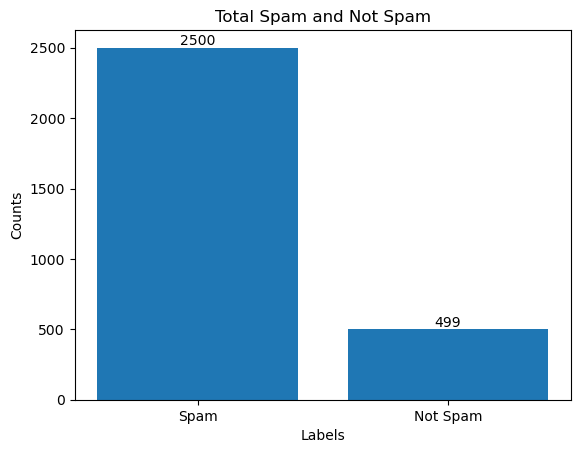

In [45]:
counts = df['label'].value_counts()
index = ['Spam', 'Not Spam']
plt.bar(x=index, height=counts.values)
plt.xlabel('Labels')
plt.ylabel('Counts')
for i, value in enumerate(counts.values):
    plt.text(x=i, y=value + 0.5, s=str(value), ha='center', va='bottom', fontsize=10)
    
plt.title('Total Spam and Not Spam')
plt.show()

In [50]:
df_spam = df[df['label'] == 0].copy()

In [62]:
df_spam.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


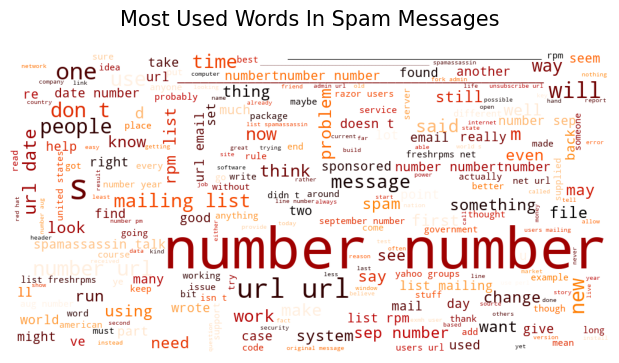

In [64]:
comment_words = ''

# Remove The Stopwords
stopwords = set(STOPWORDS)

# Iterate Through The Column
for val in df_spam.email:

    # Typecaste Each Val to String
    val = str(val)

    # Split The Value
    tokens = val.split()

    # Converts Each Token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

# Set Parameters
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat_r').generate(comment_words)

# Set Labels
plt.figure(figsize = (6,6), facecolor = None)
plt.title('Most Used Words In Spam Messages', fontsize = 15, pad=20)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Display Chart
plt.show()
     

## Splitting the dataset and training the model

In [72]:
X = df['email']
y = df['label']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [80]:
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [88]:
cm = confusion_matrix(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

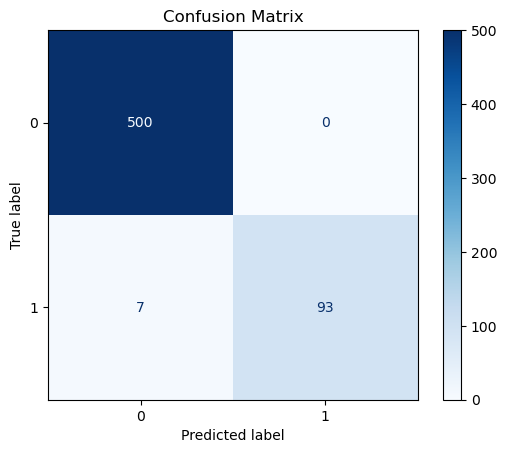

In [92]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [94]:
# accuracy
acc

0.9883333333333333

## Testing on new message

In [118]:
prediction = clf.predict(['Please click on this url to get free bitcoin '])
if prediction == 0:
    print('Not Spam')
else:
    print('Spam')

Spam
